# Домашняя работа №3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [23]:
# следующая строчка подключает сертификат для защищенного соединения
# ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [24]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

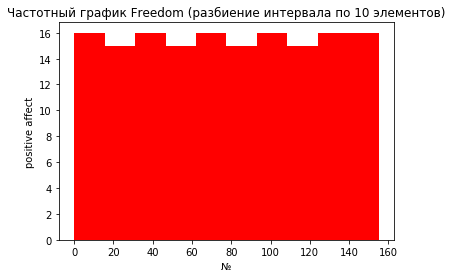

In [59]:
n, bins, patches = plt.hist(df['Freedom'], 10, facecolor='r')
plt.xlabel('№')
plt.ylabel('positive affect')
plt.title('Частотный график Freedom (разбиение интервала по 10 элементов)')
plt.show()
# распределение можно принять как равномерное

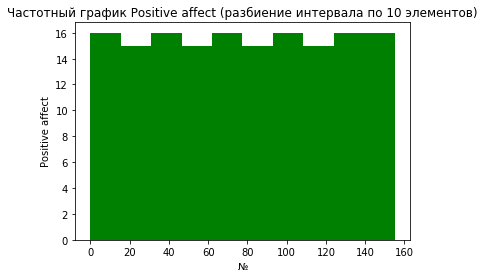

In [60]:
n, bins, patches = plt.hist(df['Positive affect'], 10, facecolor='g')
plt.xlabel('№')
plt.ylabel('Positive affect')
plt.title('Частотный график Positive affect (разбиение интервала по 10 элементов)')
plt.show()
## распределение можно принять как равномерное

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [42]:
df=df.fillna(0)

In [44]:
statistics.median(df['Freedom'])

77.5

In [45]:
statistics.mean(df['Freedom'])

77.5

In [48]:
statistics.mode(df['Freedom'])

StatisticsError: no unique mode; found 156 equally common values

In [49]:
statistics.pstdev(df['Freedom'])

45.032395746469746

In [50]:
statistics.pvariance(df['Freedom'])

2027.9166666666667

In [51]:
min(df['Freedom'])
# 0 потому что длляя одной страны значения nan было заменено    на 0

0.0

In [52]:
max(df['Freedom'])
# из 156 стран рейтинг свободы был указан только для 155

155.0

In [ ]:
# Смысла считать выбросы нет, так как по параметру Freedom все значения уникальны

In [61]:
freedom_range = max(df['Freedom']) - min(df['Freedom'])
print(freedom_range)

155.0


Почему нельзя найти моду?

In [0]:
# Мода не может быть посчитана, так как нет значения, которое встречается чаще всего. 
# все значения уникальны или встречаются одинаковое количество раз, потому что в дата сете 
# указаны места в рейтинге по разным категориям

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

Коэффициент корреляции Пирсона: 0.6878506740844936


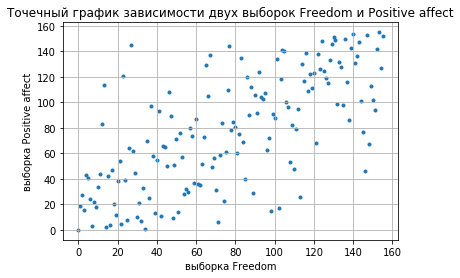

In [65]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(df['Freedom'], df['Positive affect'])
plt.xlabel('выборка Freedom')
plt.ylabel('выборка Positive affect')
plt.title('Точечный график зависимости двух выборок Freedom и Positive affect')
plt.grid(True)
plt.scatter(df['Freedom'], df['Positive affect'], marker='.')
print('Коэффициент корреляции Пирсона:', corr)
#у нас положительная корреляция между позицией страны по критерию Freedom и позицией страны по критерию Positive affect

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [71]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))

duration_2 = min_max_scaler.fit_transform(np.array(df['Freedom']).reshape(-1,1))
print(min(duration_2))
print(max(duration_2))

[0.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

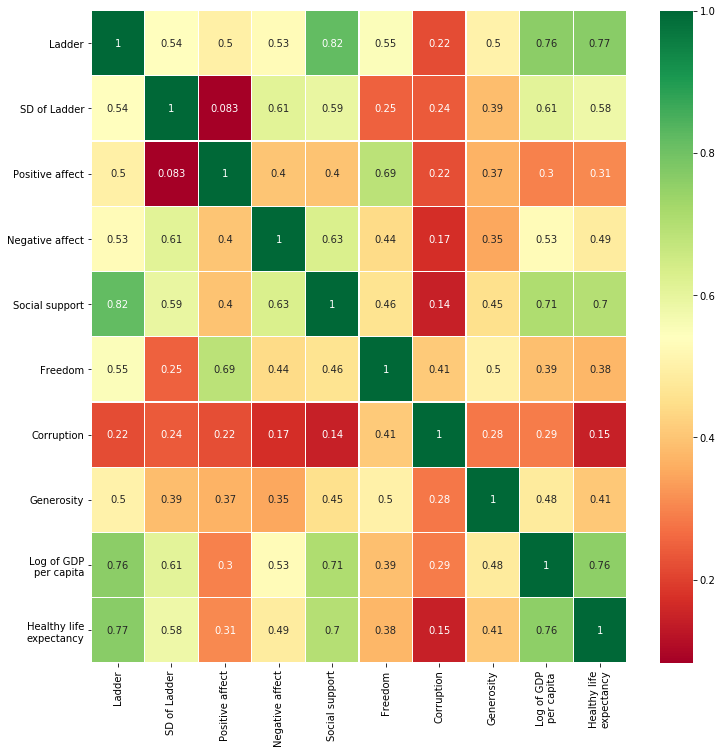

In [72]:
import seaborn as sns

sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Загрузить таблицу цен на авокадо: 

In [76]:
df=pd.read_csv('data/avocado.csv')
df[:5]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

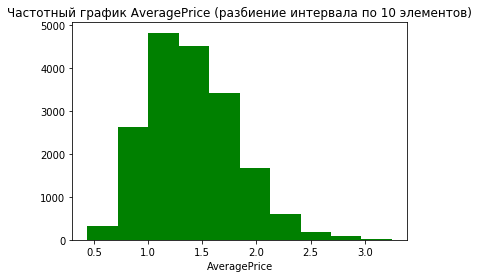

In [78]:
n, bins, patches = plt.hist(df['AveragePrice'], 10, facecolor='g')
plt.xlabel('AveragePrice')
plt.ylabel('')
plt.title('Частотный график AveragePrice (разбиение интервала по 10 элементов)')
plt.show()
# с большой натяжкой распределение можно отнести к нормальному

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

Коэффициент корреляции Пирсона: -0.2083170484878848


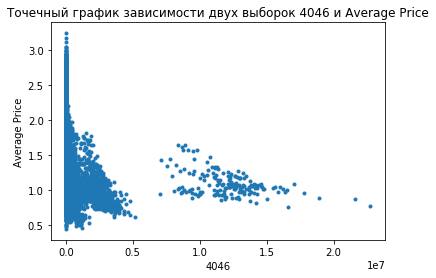

In [84]:
corr, p_value = pearsonr(df['4046'], df['AveragePrice'])
plt.xlabel('4046')
plt.ylabel('Average Price')
plt.title('Точечный график зависимости двух выборок 4046 и Average Price')
plt.scatter(df['4046'], df['AveragePrice'], marker='.')
print('Коэффициент корреляции Пирсона:', corr)

Коэффициент корреляции Пирсона: -0.17292777250933541


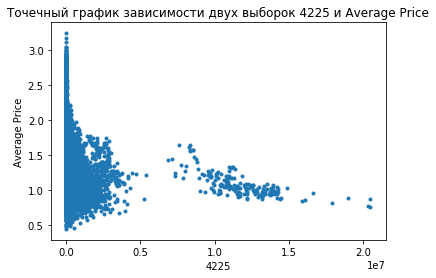

In [86]:
corr, p_value = pearsonr(df['4225'], df['AveragePrice'])
plt.xlabel('4225')
plt.ylabel('Average Price')
plt.title('Точечный график зависимости двух выборок 4225 и Average Price')
plt.scatter(df['4225'], df['AveragePrice'], marker='.')
print('Коэффициент корреляции Пирсона:', corr)

Коэффициент корреляции Пирсона: -0.1794459839797562


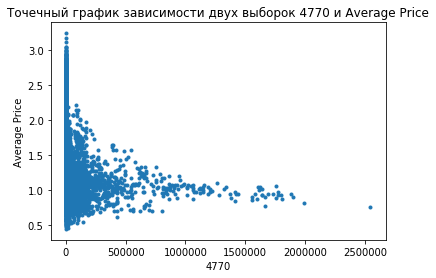

In [85]:
corr, p_value = pearsonr(df['4770'], df['AveragePrice'])
plt.xlabel('4770')
plt.ylabel('Average Price')
plt.title('Точечный график зависимости двух выборок 4770 и Average Price')
plt.scatter(df['4770'], df['AveragePrice'], marker='.')
print('Коэффициент корреляции Пирсона:', corr)

Для всех трёх случаев корреляция отрицательная и близка к нулю, поэтому мы можем говорить, что корреляция между количеством проданных авокадо с определённым кодом и средней ценой всех проданных за день авокадо несущественная.